In [1]:
from random import randint,random
from math import exp, log
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)
%matplotlib inline

## Make test sets

In [2]:
x1_test = []; x2_test = []; y_test = []
n = 100
for i in range(n):
    x1_test.append(randint(-10,10))
    x2_test.append(randint(-10,10))
    if x1_test[-1]+x2_test[-1] > 0:
        y_test.append(1)
    else:
        y_test.append(0)

## Time comparison: element wise vs vectorized version (m=1000, k=100)

### Make training sets

In [3]:
x1_train = [];  x2_train = []; y_train = []; m = 1000; k = 100
for i in range(m):
    x1_train.append(randint(-10,10))
    x2_train.append(randint(-10,10))
    if x1_train[-1]+x2_train[-1] > 0:
        y_train.append(1)
    else:
        y_train.append(0)
x_train = np.array([[x1,x2] for x1,x2 in zip(x1_train,x2_train)])
x_train = np.swapaxes(x_train,0,1)

### Make test set for vectorized version

In [4]:
x_test = np.array([np.array([x1,x2]) for x1, x2 in zip(x1_test,x2_test)])
x_test = np.swapaxes(x_test,0,1)

### Element wise

In [5]:
# alpha = 0.0001
time_ret = []

w1 = 0; w2 = 0; b = 0; alpha = 0.0001
start = time.process_time()
for i in range(k):
    J = 0; dw1 = 0; dw2 = 0; db = 0; correct = 0
    for j in range(m):
        # dw1 = x1 * (a-y)
        # dw2 = x2 * (a-y)
        # db = a-y
        z_i = w1*x1_train[j]+w2*x2_train[j]+b
        a_i = exp(z_i)/(1+exp(z_i))
        # if y_hat > 0.5: set y_hat = 1 (for accuracy evaluation)
        if a_i > 0.5:
            #a_i = 1
            if(y_train[j] == 1):
                correct += 1
        else:
            #a_i = 0
            if(y_train[j] == 0):
                correct += 1
        J += -1*(y_train[j]*log(max(1e-6,a_i)) + (1-y_train[j])*log(max(1e-6,1-a_i)))
        dz_i = a_i - y_train[j]
        dw1 += x1_train[j]*dz_i
        dw2 += x2_train[j]*dz_i
        db += dz_i
    # Average
    J /= m
    dw1 /= m
    dw2 /= m
    db /= m

    w1 -= alpha * dw1
    w2 -= alpha * dw2
    b -= alpha * db
    '''
    print("Training Session: {}".format(i+1))
    print("Training Cost: {}".format(J))
    print("Training Accuracy: {}%".format(correct/1000*100))
    print("W1: {0}, W2: {1}, b: {2}".format(w1,w2,b))
    print("====================================================================================")
    '''
end = time.process_time()
print(end-start)
# Test session
J = 0 ; correct = 0
for i in range(n):
    # dw1 = x1 * (a-y)
    # dw2 = x2 * (a-y)
    # db = a-y
    z_i = w1*x1_test[i]+w2*x2_test[i]+b
    a_i = exp(z_i)/(1+exp(z_i))
    # if y_hat > 0.5: set y_hat = 1 (for accuracy evaluation)
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
    J += -1*(y_test[i]*log(max(1e-6,a_i)) + (1-y_test[i])*log(max(1e-6,1-a_i)))

# Average
J /= n
'''
print("Test Cost: {}".format(J))
print("Test Accuracy: {}%".format(correct/100*100))
'''
print("Test Accuracy: {}%".format(correct/100*100))

0.20941966
Test Accuracy: 97.0%


### Vectorized

In [6]:
# Train session
# alpha = 0.0001
w = np.array([0.0, 0.0]); b = 0; alpha = 0.0001
start = time.process_time()
for i in range(k):
    Z = np.dot(w,x_train)+b
    A = np.exp(Z)/(1+np.exp(Z))
    dZ = A - y_train
    dw = np.matmul(x_train,np.transpose(dZ))/m
    db = np.sum(dZ)/m
    w -= alpha * dw
    b -= alpha * db
    '''
    print("Training Session: {}".format(i+1))
    print("Training Cost: {}".format(J))
    print("Training Accuracy: {}%".format(correct/1000*100))
    print("W1: {0}, W2: {1}, b: {2}".format(w1,w2,b))
    print("====================================================================================")
    '''
end = time.process_time()
print(end-start)

# Test session
correct=0
Z = np.dot(w,x_test)+b
A = np.exp(Z)/(1+np.exp(Z))
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
print("Test Accuracy: {}%".format(correct/100*100))

0.017011446000000152
Test Accuracy: 97.0%


## Estimated unknown function parameters w & b

In [7]:
print(w,b)

[0.01670088 0.01710028] -0.00024590951218160154


## Empirically determined hyper parameter alpha

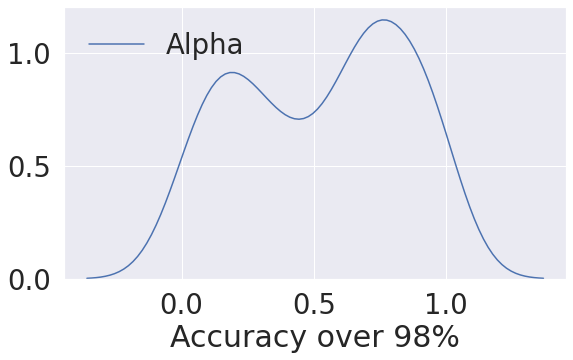

In [8]:
w = np.array([0.0, 0.0]); b = 0; m = 1000; k = 100
alphas = {random() for i in range(100)}
result = {}
for alpha in alphas:
    for i in range(k):
        Z = np.dot(w,x_train)+b
        A = np.exp(Z)/(1+np.exp(Z))
        dZ = A - y_train
        dw = np.matmul(x_train,np.transpose(dZ))/m
        db = np.sum(dZ)/m
        w -= alpha * dw
        b -= alpha * db

    # Test session
    correct=0
    Z = np.dot(w,x_test)+b
    A = np.exp(Z)/(1+np.exp(Z))
    for i,a_i in enumerate(A):
        if a_i > 0.5:
            #a_i = 1
            if(y_test[i] == 1):
                correct += 1
        else:
            #a_i = 0
            if(y_test[i] == 0):
                correct += 1
    result[alpha] = correct/100*100
result = sorted(result.items(), key=lambda x: x[1], reverse=True)
data = pd.DataFrame(result, columns=['Alpha', 'Accuracy'])
f, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(data[data['Accuracy']>98]['Alpha'], ax=ax)
plt.xlabel("Accuracy over 98%")
plt.show()

## Accuracy

### m = 10,  k = 100

### Make training set

In [9]:
x1_train = [];  x2_train = []; y_train = []; m = 10; k = 100
for i in range(m):
    x1_train.append(randint(-10,10))
    x2_train.append(randint(-10,10))
    if x1_train[-1]+x2_train[-1] > 0:
        y_train.append(1)
    else:
        y_train.append(0)
x_train = np.array([[x1,x2] for x1,x2 in zip(x1_train,x2_train)])
x_train = np.swapaxes(x_train,0,1)

In [10]:
# Training session
w = np.array([0.0, 0.0]); b = 0; alpha = 0.0001
for i in range(k):
    Z = np.dot(w,x_train)+b
    A = np.exp(Z)/(1+np.exp(Z))
    dZ = A - y_train
    dw = np.matmul(x_train,np.transpose(dZ))/m
    db = np.sum(dZ)/m
    w -= alpha * dw
    b -= alpha * db

# accuracy: test
correct=0
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_train[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_train[i] == 0):
            correct += 1
print("Training accuracy: {}".format(correct/m*100))

# Test session
correct=0
Z = np.dot(w,x_test)+b
A = np.exp(Z)/(1+np.exp(Z))
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
print("Test accuracy: {}".format(correct/n*100))

Training accuracy: 80.0
Test accuracy: 77.0


### m = 100, k = 100

### Make training set

In [11]:
x1_train = [];  x2_train = []; y_train = []; m = 100; k = 100
for i in range(m):
    x1_train.append(randint(-10,10))
    x2_train.append(randint(-10,10))
    if x1_train[-1]+x2_train[-1] > 0:
        y_train.append(1)
    else:
        y_train.append(0)
x_train = np.array([[x1,x2] for x1,x2 in zip(x1_train,x2_train)])
x_train = np.swapaxes(x_train,0,1)

In [12]:
# Training session
w = np.array([0.0, 0.0]); b = 0; alpha = 0.0001
for i in range(k):
    Z = np.dot(w,x_train)+b
    A = np.exp(Z)/(1+np.exp(Z))
    dZ = A - y_train
    dw = np.matmul(x_train,np.transpose(dZ))/m
    db = np.sum(dZ)/m
    w -= alpha * dw
    b -= alpha * db

# accuracy: test
correct=0
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_train[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_train[i] == 0):
            correct += 1
print("Training accuracy: {}".format(correct/m*100))

# Test session
correct=0
Z = np.dot(w,x_test)+b
A = np.exp(Z)/(1+np.exp(Z))
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
print("Test accuracy: {}".format(correct/n*100))

Training accuracy: 95.0
Test accuracy: 96.0


### m = 1000, k = 100

In [13]:
### Make training set

In [14]:
x1_train = [];  x2_train = []; y_train = []; m = 1000; k = 100
for i in range(m):
    x1_train.append(randint(-10,10))
    x2_train.append(randint(-10,10))
    if x1_train[-1]+x2_train[-1] > 0:
        y_train.append(1)
    else:
        y_train.append(0)
x_train = np.array([[x1,x2] for x1,x2 in zip(x1_train,x2_train)])
x_train = np.swapaxes(x_train,0,1)

In [15]:
# Training session
w = np.array([0.0, 0.0]); b = 0; alpha = 0.0001
for i in range(k):
    Z = np.dot(w,x_train)+b
    A = np.exp(Z)/(1+np.exp(Z))
    dZ = A - y_train
    dw = np.matmul(x_train,np.transpose(dZ))/m
    db = np.sum(dZ)/m
    w -= alpha * dw
    b -= alpha * db

# accuracy: test
correct=0
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_train[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_train[i] == 0):
            correct += 1
print("Training accuracy: {}".format(correct/m*100))

# Test session
correct=0
Z = np.dot(w,x_test)+b
A = np.exp(Z)/(1+np.exp(Z))
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
print("Test accuracy: {}".format(correct/n*100))

Training accuracy: 97.3
Test accuracy: 100.0


### m = 100, k = 10

In [16]:
### Make training set

In [17]:
x1_train = [];  x2_train = []; y_train = []; m = 100; k = 10
for i in range(m):
    x1_train.append(randint(-10,10))
    x2_train.append(randint(-10,10))
    if x1_train[-1]+x2_train[-1] > 0:
        y_train.append(1)
    else:
        y_train.append(0)
x_train = np.array([[x1,x2] for x1,x2 in zip(x1_train,x2_train)])
x_train = np.swapaxes(x_train,0,1)

In [18]:
# Training session
w = np.array([0.0, 0.0]); b = 0; alpha = 0.0001
for i in range(k):
    Z = np.dot(w,x_train)+b
    A = np.exp(Z)/(1+np.exp(Z))
    dZ = A - y_train
    dw = np.matmul(x_train,np.transpose(dZ))/m
    db = np.sum(dZ)/m
    w -= alpha * dw
    b -= alpha * db

# accuracy: test
correct=0
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_train[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_train[i] == 0):
            correct += 1
print("Training accuracy: {}".format(correct/m*100))

# Test session
correct=0
Z = np.dot(w,x_test)+b
A = np.exp(Z)/(1+np.exp(Z))
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
print("Test accuracy: {}".format(correct/n*100))

Training accuracy: 97.0
Test accuracy: 98.0


### m = 100, k = 100

In [19]:
### Make training set

In [20]:
x1_train = [];  x2_train = []; y_train = []; m = 100; k = 100
for i in range(m):
    x1_train.append(randint(-10,10))
    x2_train.append(randint(-10,10))
    if x1_train[-1]+x2_train[-1] > 0:
        y_train.append(1)
    else:
        y_train.append(0)
x_train = np.array([[x1,x2] for x1,x2 in zip(x1_train,x2_train)])
x_train = np.swapaxes(x_train,0,1)

In [21]:
# Training session
w = np.array([0.0, 0.0]); b = 0; alpha = 0.0001
for i in range(k):
    Z = np.dot(w,x_train)+b
    A = np.exp(Z)/(1+np.exp(Z))
    dZ = A - y_train
    dw = np.matmul(x_train,np.transpose(dZ))/m
    db = np.sum(dZ)/m
    w -= alpha * dw
    b -= alpha * db

# accuracy: test
correct=0
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_train[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_train[i] == 0):
            correct += 1
print("Training accuracy: {}".format(correct/m*100))

# Test session
correct=0
Z = np.dot(w,x_test)+b
A = np.exp(Z)/(1+np.exp(Z))
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
print("Test accuracy: {}".format(correct/n*100))

Training accuracy: 97.0
Test accuracy: 98.0


### m = 100, k = 1000

In [22]:
### Make training set

In [23]:
x1_train = [];  x2_train = []; y_train = []; m = 100; k = 1000
for i in range(m):
    x1_train.append(randint(-10,10))
    x2_train.append(randint(-10,10))
    if x1_train[-1]+x2_train[-1] > 0:
        y_train.append(1)
    else:
        y_train.append(0)
x_train = np.array([[x1,x2] for x1,x2 in zip(x1_train,x2_train)])
x_train = np.swapaxes(x_train,0,1)

In [24]:
# Training session
w = np.array([0.0, 0.0]); b = 0; alpha = 0.0001
for i in range(k):
    Z = np.dot(w,x_train)+b
    A = np.exp(Z)/(1+np.exp(Z))
    dZ = A - y_train
    dw = np.matmul(x_train,np.transpose(dZ))/m
    db = np.sum(dZ)/m
    w -= alpha * dw
    b -= alpha * db

# accuracy: test
correct=0
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_train[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_train[i] == 0):
            correct += 1
print("Training accuracy: {}".format(correct/m*100))

# Test session
correct=0
Z = np.dot(w,x_test)+b
A = np.exp(Z)/(1+np.exp(Z))
for i,a_i in enumerate(A):
    if a_i > 0.5:
        #a_i = 1
        if(y_test[i] == 1):
            correct += 1
    else:
        #a_i = 0
        if(y_test[i] == 0):
            correct += 1
print("Test accuracy: {}".format(correct/n*100))

Training accuracy: 94.0
Test accuracy: 98.0
